In [18]:
from pathlib import Path
import pandas as pd
import numpy as np

In [19]:
btc_df = pd.read_csv(Path("Resources/BitcoinData.csv"), parse_dates=True, index_col='time')
eth_df = pd.read_csv(Path("Resources/EthereumData.csv"), parse_dates=True, index_col='time')
ada_df = pd.read_csv(Path("Resources/CardanoData.csv"), parse_dates=True, index_col='time')
usdt_df = pd.read_csv(Path("Resources/TetherData.csv"), parse_dates=True, index_col='time')
ltc_df = pd.read_csv(Path("Resources/LitecoinData.csv"), parse_dates=True, index_col='time')
dgb_df = pd.read_csv(Path("Resources/DigiByteData.csv"), parse_dates=True, index_col='time')
xrp_df = pd.read_csv(Path("Resources/RippleData.csv"), parse_dates=True, index_col='time')
trx_df = pd.read_csv(Path("Resources/TronData.csv"), parse_dates=True, index_col='time')
tusd_df = pd.read_csv(Path("Resources/TrueUSDData.csv"), parse_dates=True, index_col='time')
bsv_df = pd.read_csv(Path("Resources/BitcoinSVData.csv"), parse_dates=True, index_col='time')
crypto_df = pd.read_csv(Path("Resources/CryptoData.csv"), parse_dates=True, index_col='time')
df_closing_prices = pd.read_csv(Path("Resources/CryptoClosingPrices.csv"), parse_dates=True, index_col='time')


In [20]:
df_daily_returns = df_closing_prices.pct_change().dropna()
df_daily_returns.head()

,BTC Close,ETH Close,ADA Close,USDT Close,XRP Close,LTC Close,TRX Close,TUSD Close,DGB Close,BSV Close
time,,,,,,,,,,
2019-03-21 00:00:00+00:00,-0.014944,-0.030154,0.000000,0.001004,-0.025237,-0.026839,-0.043478,0.000000,-0.071429,-0.019694
2019-03-22 00:00:00+00:00,0.001543,0.009445,0.055556,-0.001003,0.003236,0.012286,0.045455,0.003003,0.000000,0.027896
2019-03-23 00:00:00+00:00,0.000776,0.002347,0.122807,-0.001004,0.000000,0.024291,0.043478,-0.000998,0.000000,-0.000856
2019-03-24 00:00:00+00:00,-0.004191,-0.005299,-0.031250,0.003015,-0.012903,-0.019001,-0.041667,0.000000,0.000000,-0.013521
2019-03-25 00:00:00+00:00,-0.014714,-0.017722,-0.048387,-0.004008,-0.019608,-0.013053,0.000000,-0.001998,-0.076923,-0.031586


In [26]:
# Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['BTC close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['BTC close'].ewm(halflife=long_window).mean()

eth_df['fast_close'] = eth_df['ETH close'].ewm(halflife=short_window).mean()
eth_df['slow_close'] = eth_df['ETH close'].ewm(halflife=long_window).mean()

ada_df['fast_close'] = ada_df['ADA close'].ewm(halflife=short_window).mean()
ada_df['slow_close'] = ada_df['ADA close'].ewm(halflife=long_window).mean()

usdt_df['fast_close'] = usdt_df['USDT close'].ewm(halflife=short_window).mean()
usdt_df['slow_close'] = usdt_df['USDT close'].ewm(halflife=long_window).mean()

xrp_df['fast_close'] = xrp_df['XRP close'].ewm(halflife=short_window).mean()
xrp_df['slow_close'] = xrp_df['XRP close'].ewm(halflife=long_window).mean()

ltc_df['fast_close'] = ltc_df['LTC close'].ewm(halflife=short_window).mean()
ltc_df['slow_close'] = ltc_df['LTC close'].ewm(halflife=long_window).mean()

trx_df['fast_close'] = trx_df['TRX close'].ewm(halflife=short_window).mean()
trx_df['slow_close'] = trx_df['TRX close'].ewm(halflife=long_window).mean()

tusd_df['fast_close'] = tusd_df['TUSD close'].ewm(halflife=short_window).mean()
tusd_df['slow_close'] = tusd_df['TUSD close'].ewm(halflife=long_window).mean()

dgb_df['fast_close'] = dgb_df['DGB close'].ewm(halflife=short_window).mean()
dgb_df['slow_close'] = dgb_df['DGB close'].ewm(halflife=long_window).mean()

bsv_df['fast_close'] = bsv_df['BSV close'].ewm(halflife=short_window).mean()
bsv_df['slow_close'] = bsv_df['BSV close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['crossover_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['crossover_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['crossover_signal'] = btc_df['crossover_long'] + btc_df['crossover_short']

eth_df['crossover_long'] = np.where(eth_df['fast_close'] > eth_df['slow_close'], 1.0, 0.0)
eth_df['crossover_short'] = np.where(eth_df['fast_close'] < eth_df['slow_close'], -1.0, 0.0)
eth_df['crossover_signal'] = eth_df['crossover_long'] + eth_df['crossover_short']

ada_df['crossover_long'] = np.where(ada_df['fast_close'] > ada_df['slow_close'], 1.0, 0.0)
ada_df['crossover_short'] = np.where(ada_df['fast_close'] < ada_df['slow_close'], -1.0, 0.0)
ada_df['crossover_signal'] = ada_df['crossover_long'] + ada_df['crossover_short']

usdt_df['crossover_long'] = np.where(usdt_df['fast_close'] > usdt_df['slow_close'], 1.0, 0.0)
usdt_df['crossover_short'] = np.where(usdt_df['fast_close'] < usdt_df['slow_close'], -1.0, 0.0)
usdt_df['crossover_signal'] = usdt_df['crossover_long'] + usdt_df['crossover_short']

xrp_df['crossover_long'] = np.where(xrp_df['fast_close'] > xrp_df['slow_close'], 1.0, 0.0)
xrp_df['crossover_short'] = np.where(xrp_df['fast_close'] < xrp_df['slow_close'], -1.0, 0.0)
xrp_df['crossover_signal'] = xrp_df['crossover_long'] + xrp_df['crossover_short']

ltc_df['crossover_long'] = np.where(ltc_df['fast_close'] > ltc_df['slow_close'], 1.0, 0.0)
ltc_df['crossover_short'] = np.where(ltc_df['fast_close'] < ltc_df['slow_close'], -1.0, 0.0)
ltc_df['crossover_signal'] = ltc_df['crossover_long'] + ltc_df['crossover_short']

trx_df['crossover_long'] = np.where(trx_df['fast_close'] > trx_df['slow_close'], 1.0, 0.0)
trx_df['crossover_short'] = np.where(trx_df['fast_close'] < trx_df['slow_close'], -1.0, 0.0)
trx_df['crossover_signal'] = trx_df['crossover_long'] + trx_df['crossover_short']

tusd_df['crossover_long'] = np.where(tusd_df['fast_close'] > tusd_df['slow_close'], 1.0, 0.0)
tusd_df['crossover_short'] = np.where(tusd_df['fast_close'] < tusd_df['slow_close'], -1.0, 0.0)
tusd_df['crossover_signal'] = tusd_df['crossover_long'] + tusd_df['crossover_short']

dgb_df['crossover_long'] = np.where(dgb_df['fast_close'] > dgb_df['slow_close'], 1.0, 0.0)
dgb_df['crossover_short'] = np.where(dgb_df['fast_close'] < dgb_df['slow_close'], -1.0, 0.0)
dgb_df['crossover_signal'] = dgb_df['crossover_long'] + dgb_df['crossover_short']

bsv_df['crossover_long'] = np.where(bsv_df['fast_close'] > bsv_df['slow_close'], 1.0, 0.0)
bsv_df['crossover_short'] = np.where(bsv_df['fast_close'] < bsv_df['slow_close'], -1.0, 0.0)
bsv_df['crossover_signal'] = bsv_df['crossover_long'] + bsv_df['crossover_short']

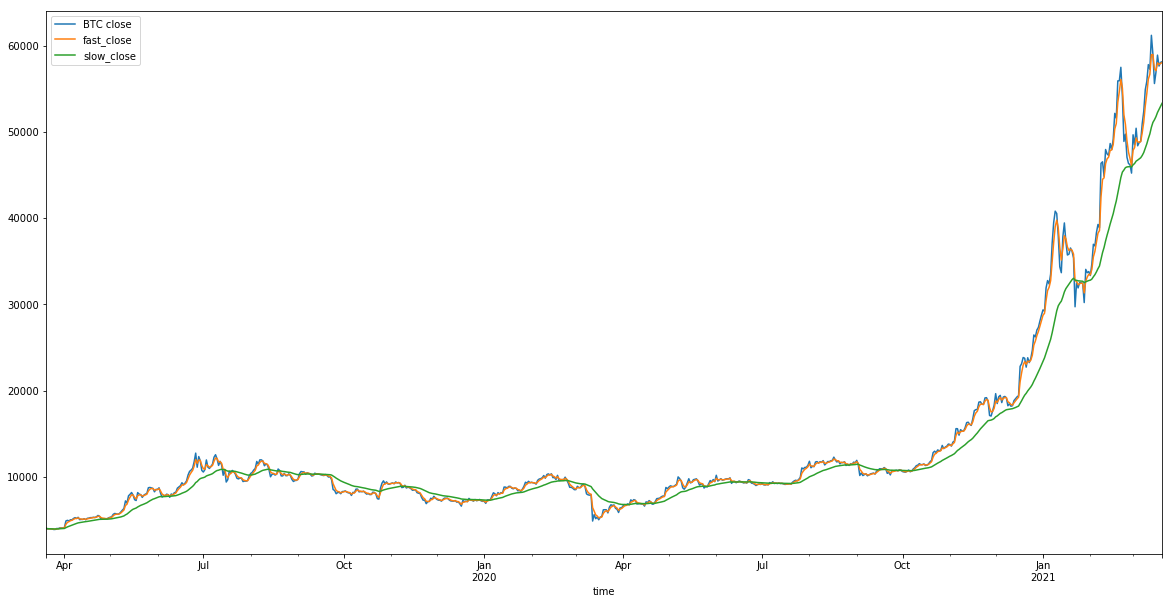

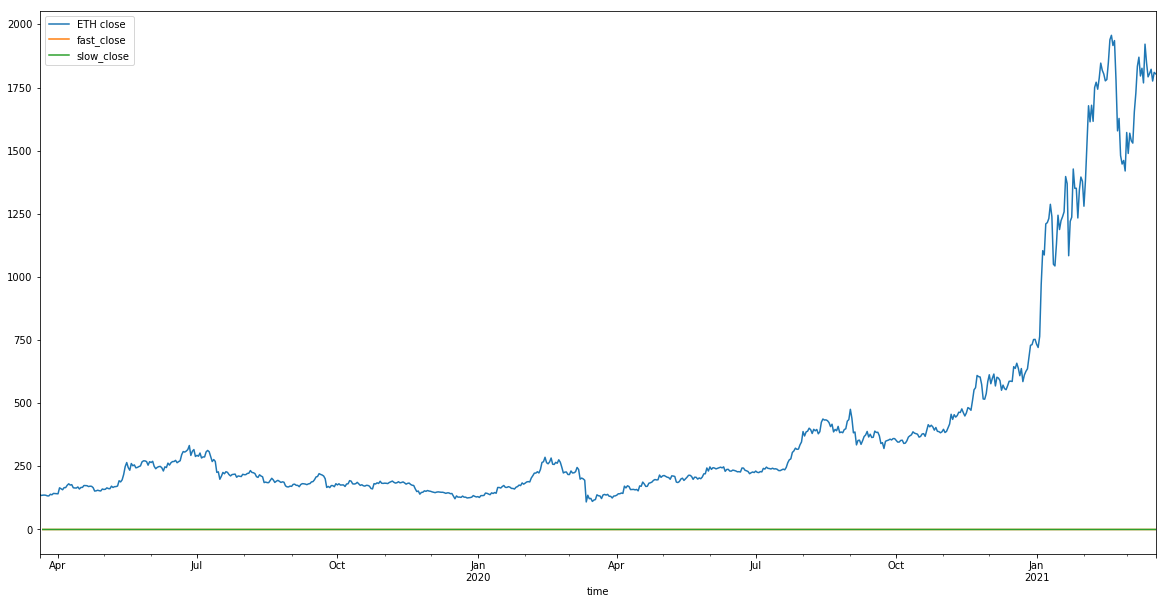

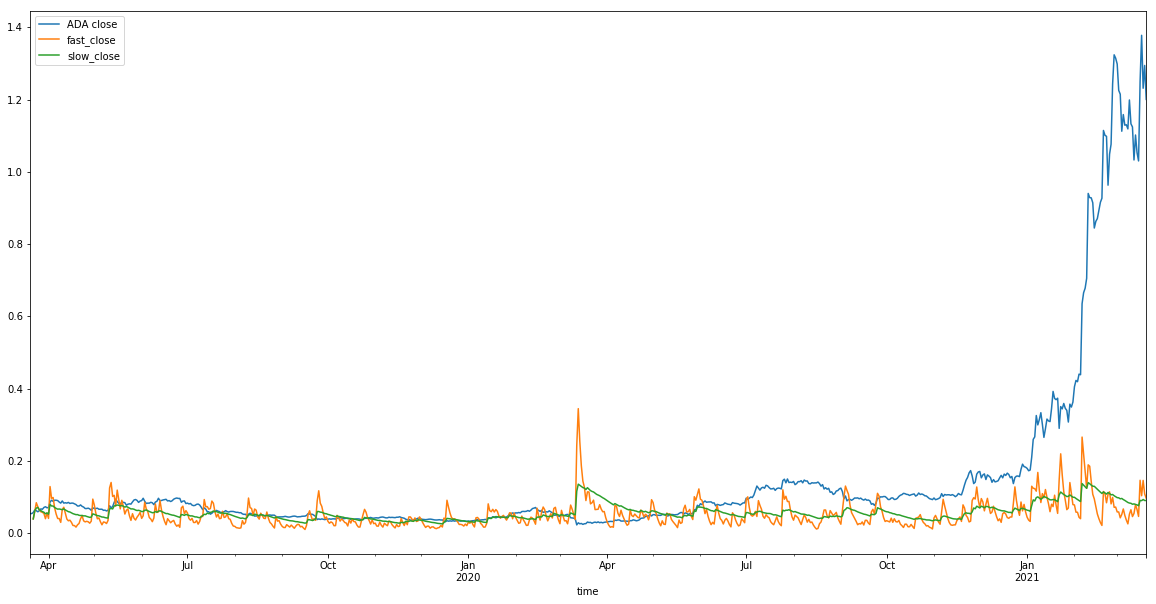

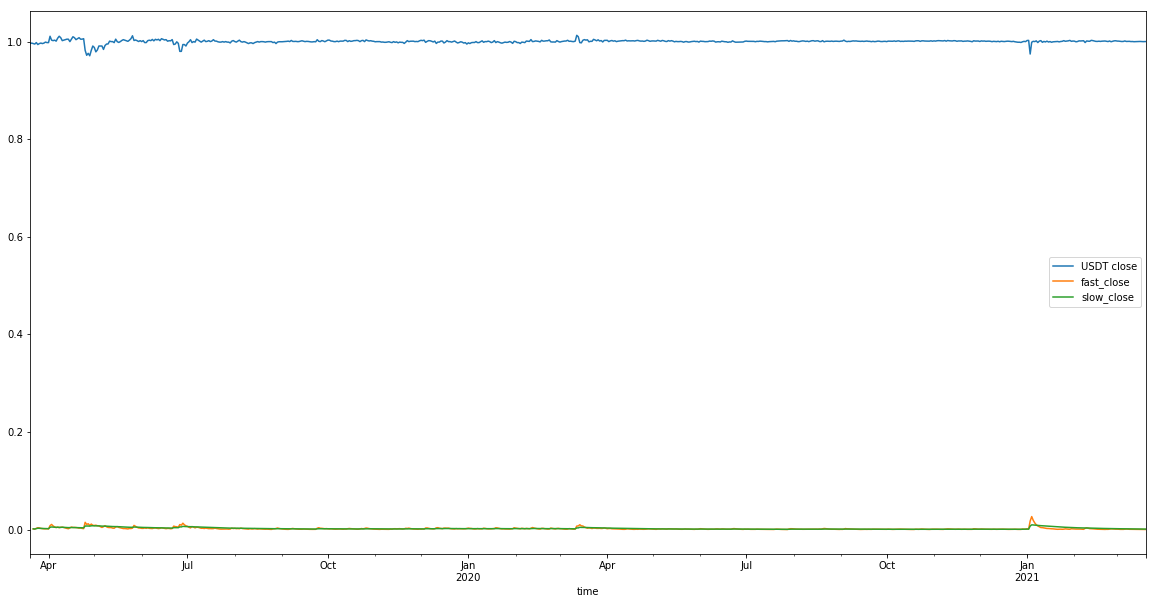

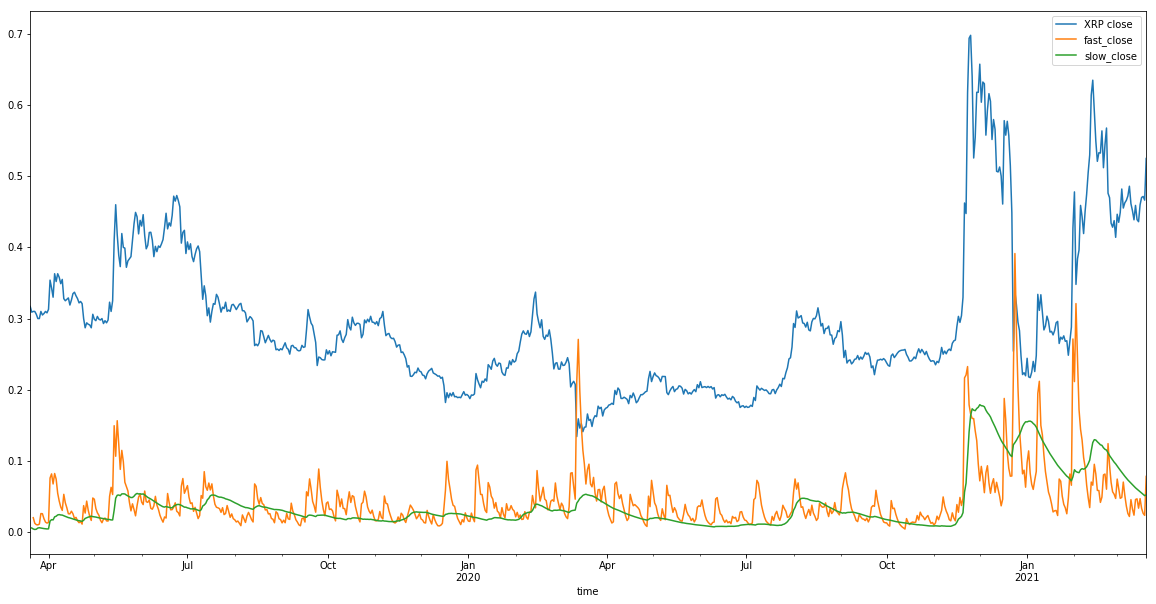

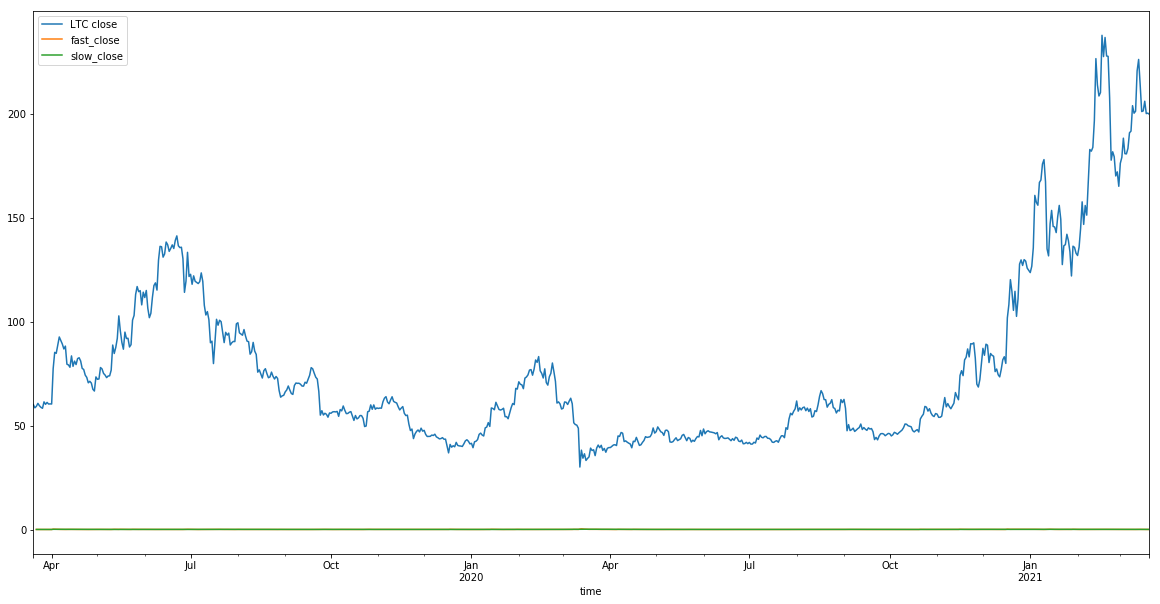

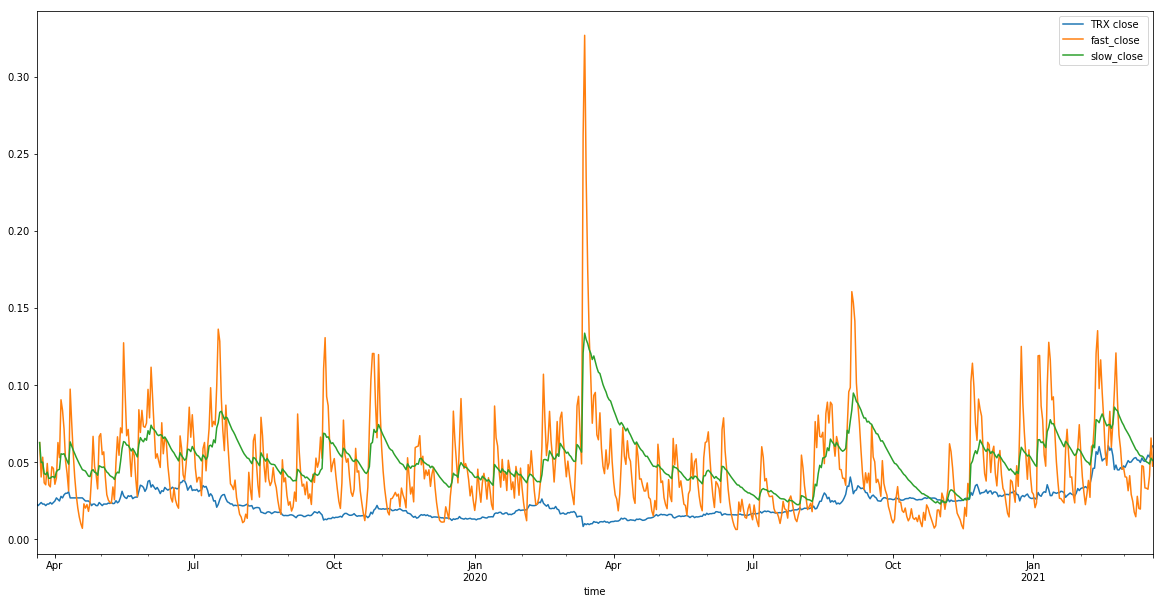

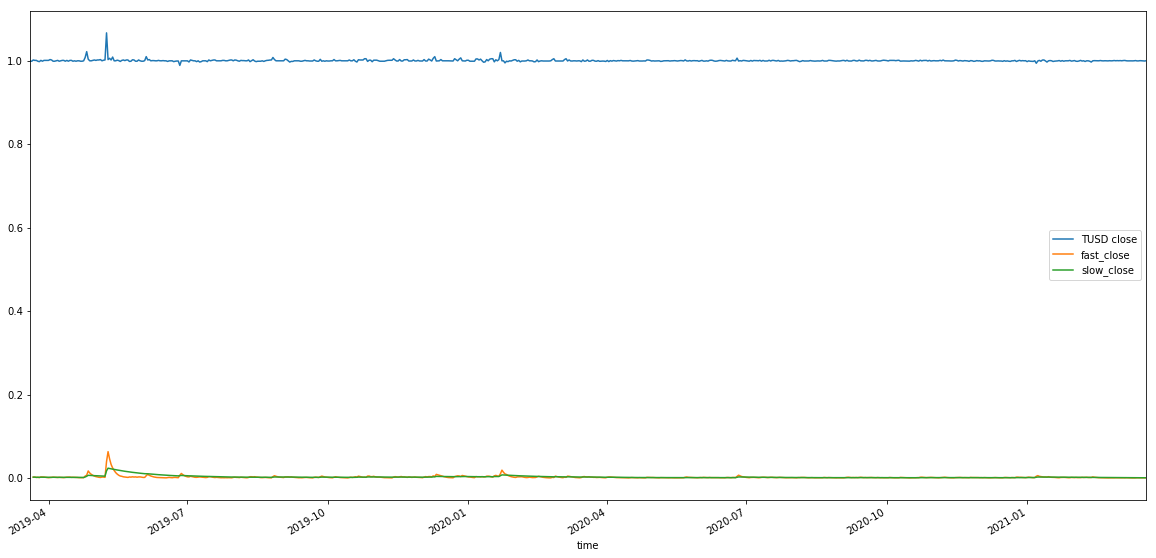

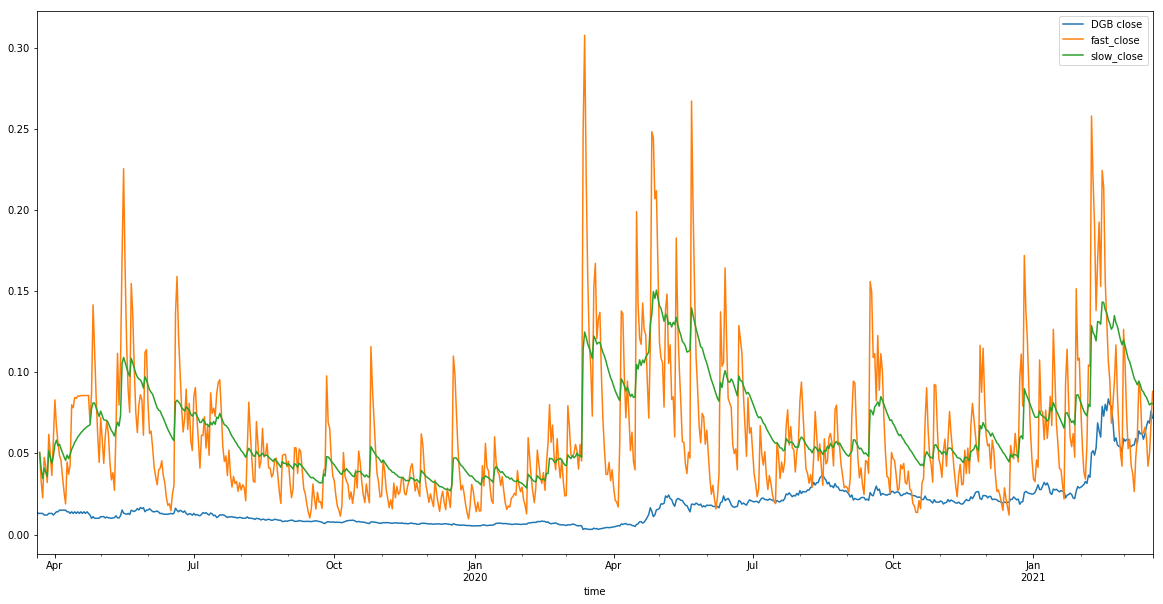

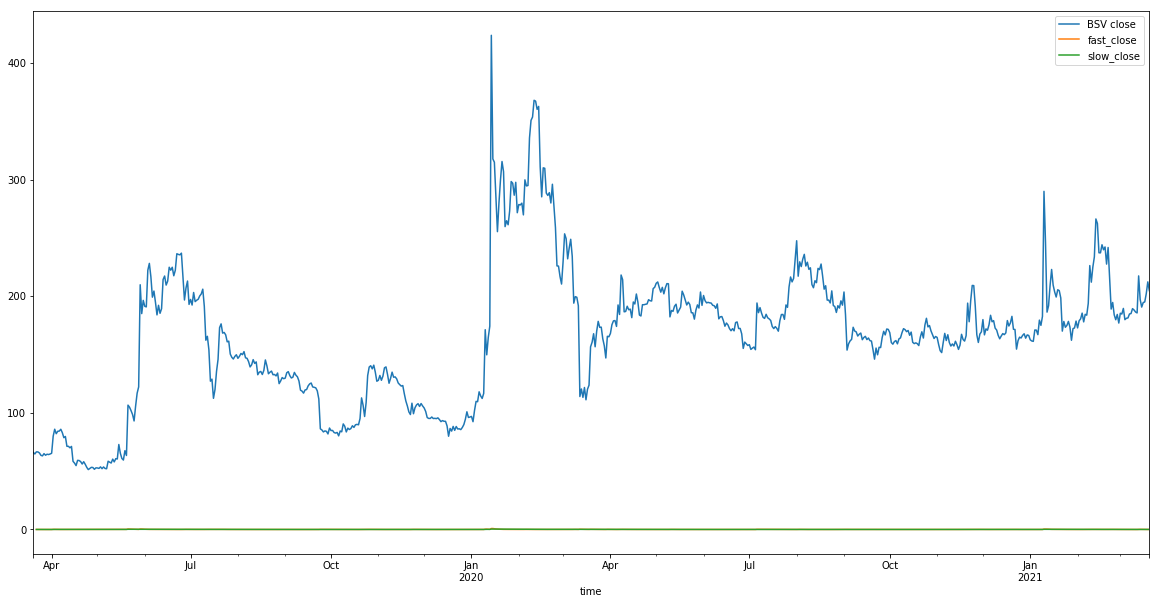

In [39]:
# Plot the EMA of crypto closing prices
btc_df[['BTC close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
eth_df[['ETH close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
ada_df[['ADA close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
usdt_df[['USDT close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
xrp_df[['XRP close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
ltc_df[['LTC close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
trx_df[['TRX close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
tusd_df[['TUSD close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
dgb_df[['DGB close', 'fast_close', 'slow_close']].plot(figsize=(20,10))
bsv_df[['BSV close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [31]:
# Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively

btc_df['fast_vol'] = btc_df['BTC daily_return'].ewm(halflife=short_vol_window).std()
btc_df['slow_vol'] = btc_df['BTC daily_return'].ewm(halflife=long_vol_window).std()

eth_df['fast_vol'] = eth_df['ETH daily_return'].ewm(halflife=short_window).std()
eth_df['slow_vol'] = eth_df['ETH daily_return'].ewm(halflife=long_window).std()

ada_df['fast_vol'] = ada_df['ADA daily_return'].ewm(halflife=short_window).std()
ada_df['slow_vol'] = ada_df['ADA daily_return'].ewm(halflife=long_window).std()

usdt_df['fast_vol'] = usdt_df['USDT daily_return'].ewm(halflife=short_window).std()
usdt_df['slow_vol'] = usdt_df['USDT daily_return'].ewm(halflife=long_window).std()

xrp_df['fast_vol'] = xrp_df['XRP daily_return'].ewm(halflife=short_window).std()
xrp_df['slow_vol'] = xrp_df['XRP close'].ewm(halflife=long_window).std()

ltc_df['fast_vol'] = ltc_df['LTC daily_return'].ewm(halflife=short_window).std()
ltc_df['slow_vol'] = ltc_df['LTC daily_return'].ewm(halflife=long_window).std()

trx_df['fast_vol'] = trx_df['TRX daily_return'].ewm(halflife=short_window).std()
trx_df['slow_vol'] = trx_df['TRX daily_return'].ewm(halflife=long_window).std()

tusd_df['fast_vol'] = tusd_df['TUSD daily_return'].ewm(halflife=short_window).std()
tusd_df['slow_vol'] = tusd_df['TUSD daily_return'].ewm(halflife=long_window).std()

dgb_df['fast_vol'] = dgb_df['DGB daily_return'].ewm(halflife=short_window).std()
dgb_df['slow_vol'] = dgb_df['DGB daily_return'].ewm(halflife=long_window).std()

bsv_df['fast_vol'] = bsv_df['BSV daily_return'].ewm(halflife=short_window).std()
bsv_df['slow_vol'] = bsv_df['BSV daily_return'].ewm(halflife=long_window).std()

# Construct a crossover trading signal

btc_df['vol_trend_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
btc_df['vol_trend_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
btc_df['vol_trend_signal'] = btc_df['vol_trend_long'] + btc_df['vol_trend_short']

eth_df['vol_trend_long'] = np.where(eth_df['fast_vol'] > eth_df['slow_vol'], 1.0, 0.0)
eth_df['vol_trend_short'] = np.where(eth_df['fast_vol'] < eth_df['slow_vol'], -1.0, 0.0)
eth_df['vol_trend_signal'] = eth_df['vol_trend_long'] + eth_df['vol_trend_short']

ada_df['vol_trend_long'] = np.where(ada_df['fast_vol'] > ada_df['slow_vol'], 1.0, 0.0)
ada_df['vol_trend_short'] = np.where(ada_df['fast_vol'] < ada_df['slow_vol'], -1.0, 0.0)
ada_df['vol_trend_signal'] = ada_df['vol_trend_long'] + ada_df['vol_trend_short']

usdt_df['vol_trend_long'] = np.where(usdt_df['fast_vol'] > usdt_df['slow_vol'], 1.0, 0.0)
usdt_df['vol_trend_short'] = np.where(usdt_df['fast_vol'] < usdt_df['slow_vol'], -1.0, 0.0)
usdt_df['vol_trend_signal'] = usdt_df['vol_trend_long'] + usdt_df['vol_trend_short']

xrp_df['vol_trend_long'] = np.where(xrp_df['fast_vol'] > xrp_df['slow_vol'], 1.0, 0.0)
xrp_df['vol_trend_short'] = np.where(xrp_df['fast_vol'] < xrp_df['slow_vol'], -1.0, 0.0)
xrp_df['vol_trend_signal'] = xrp_df['vol_trend_long'] + xrp_df['vol_trend_short']

ltc_df['vol_trend_long'] = np.where(ltc_df['fast_vol'] > ltc_df['slow_vol'], 1.0, 0.0)
ltc_df['vol_trend_short'] = np.where(ltc_df['fast_vol'] < ltc_df['slow_vol'], -1.0, 0.0)
ltc_df['vol_trend_signal'] = ltc_df['vol_trend_long'] + ltc_df['vol_trend_short']

trx_df['vol_trend_long'] = np.where(trx_df['fast_vol'] > trx_df['slow_vol'], 1.0, 0.0)
trx_df['vol_trend_short'] = np.where(trx_df['fast_vol'] < trx_df['slow_vol'], -1.0, 0.0)
trx_df['vol_trend_signal'] = trx_df['vol_trend_long'] + trx_df['vol_trend_short']

tusd_df['vol_trend_long'] = np.where(tusd_df['fast_vol'] > tusd_df['slow_vol'], 1.0, 0.0)
tusd_df['vol_trend_short'] = np.where(tusd_df['fast_vol'] < tusd_df['slow_vol'], -1.0, 0.0)
tusd_df['vol_trend_signal'] = tusd_df['vol_trend_long'] + tusd_df['vol_trend_short']

dgb_df['vol_trend_long'] = np.where(dgb_df['fast_vol'] > dgb_df['slow_vol'], 1.0, 0.0)
dgb_df['vol_trend_short'] = np.where(dgb_df['fast_vol'] < dgb_df['slow_vol'], -1.0, 0.0)
dgb_df['vol_trend_signal'] = dgb_df['vol_trend_long'] + dgb_df['vol_trend_short']

bsv_df['vol_trend_long'] = np.where(bsv_df['fast_vol'] > bsv_df['slow_vol'], 1.0, 0.0)
bsv_df['vol_trend_short'] = np.where(bsv_df['fast_vol'] < bsv_df['slow_vol'], -1.0, 0.0)
bsv_df['vol_trend_signal'] = bsv_df['vol_trend_long'] + bsv_df['vol_trend_short']

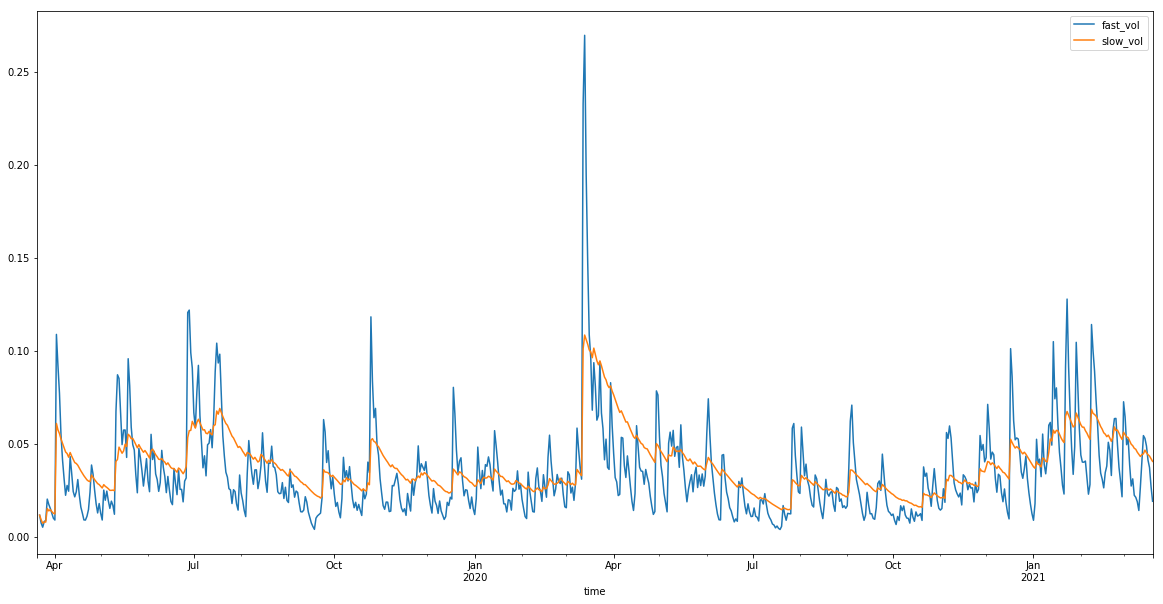

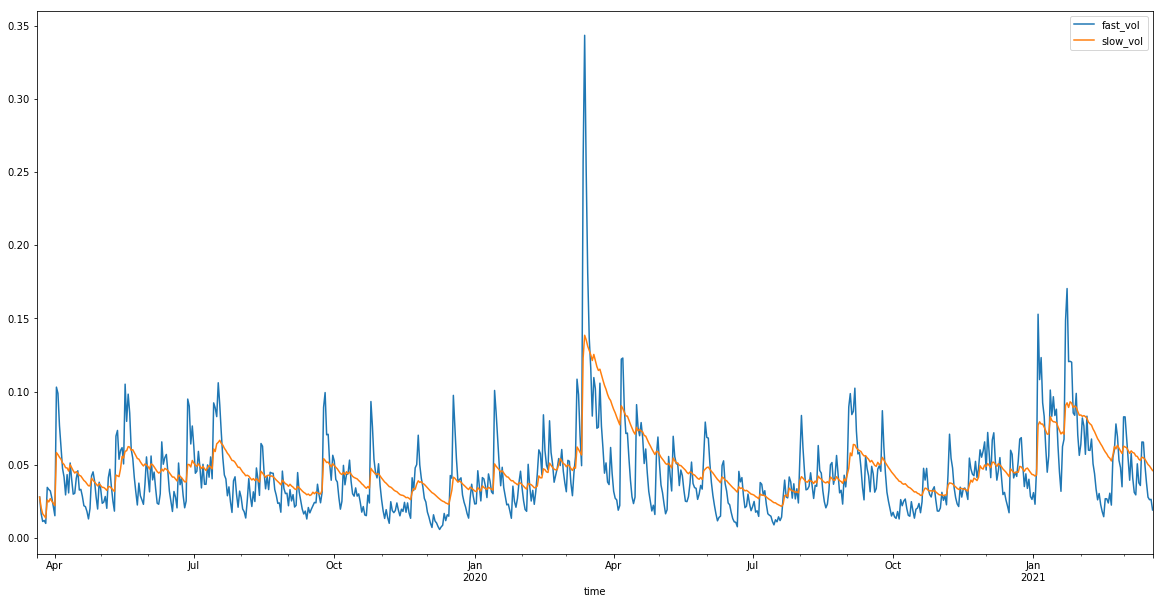

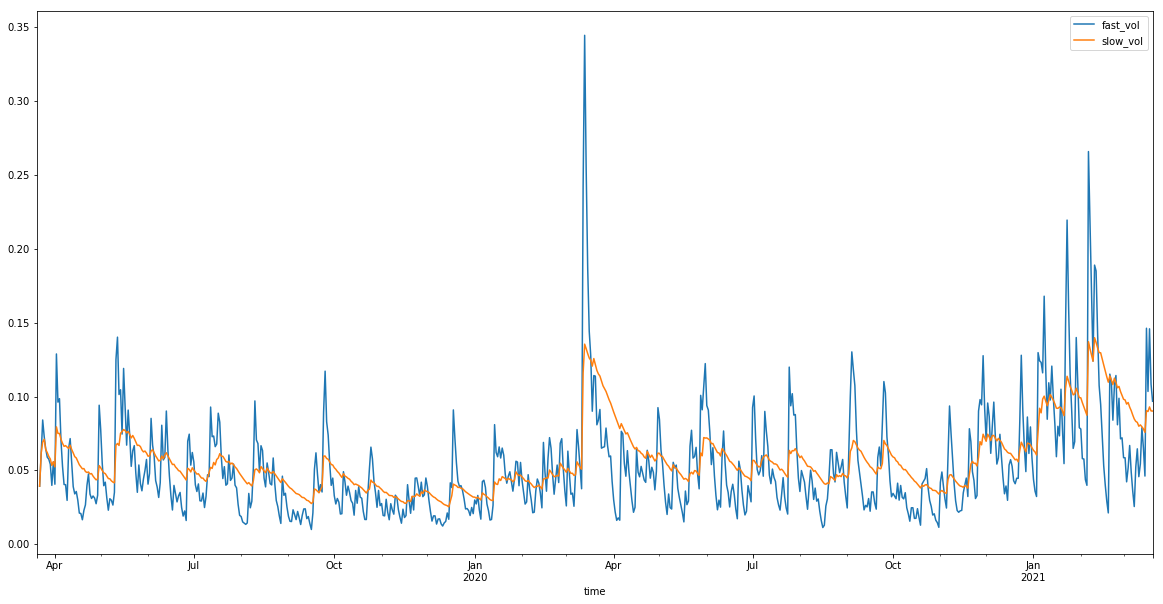

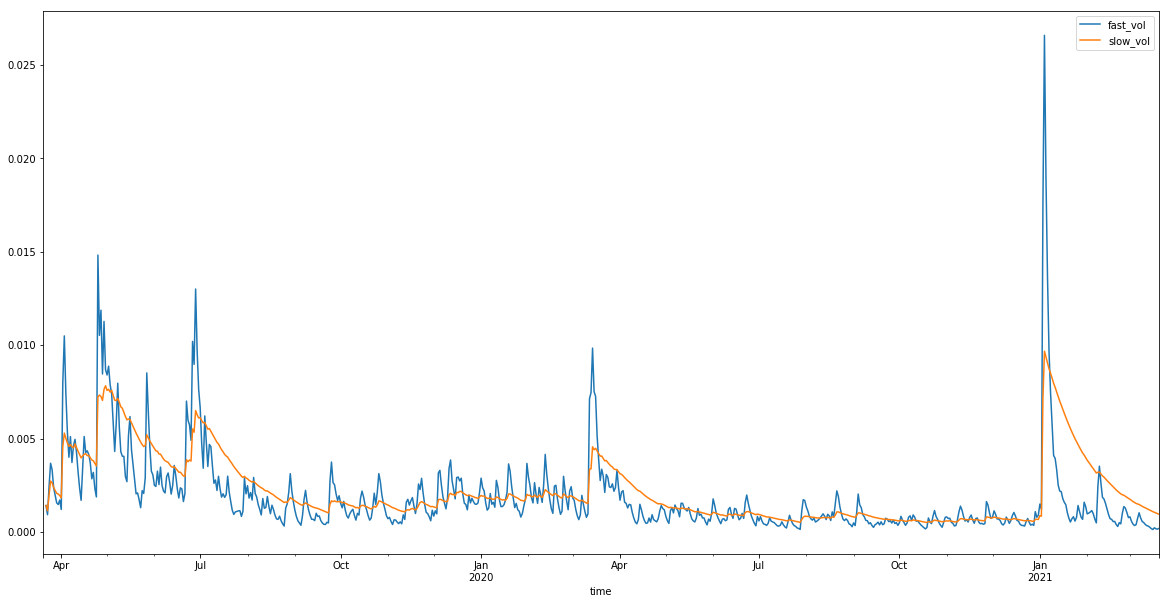

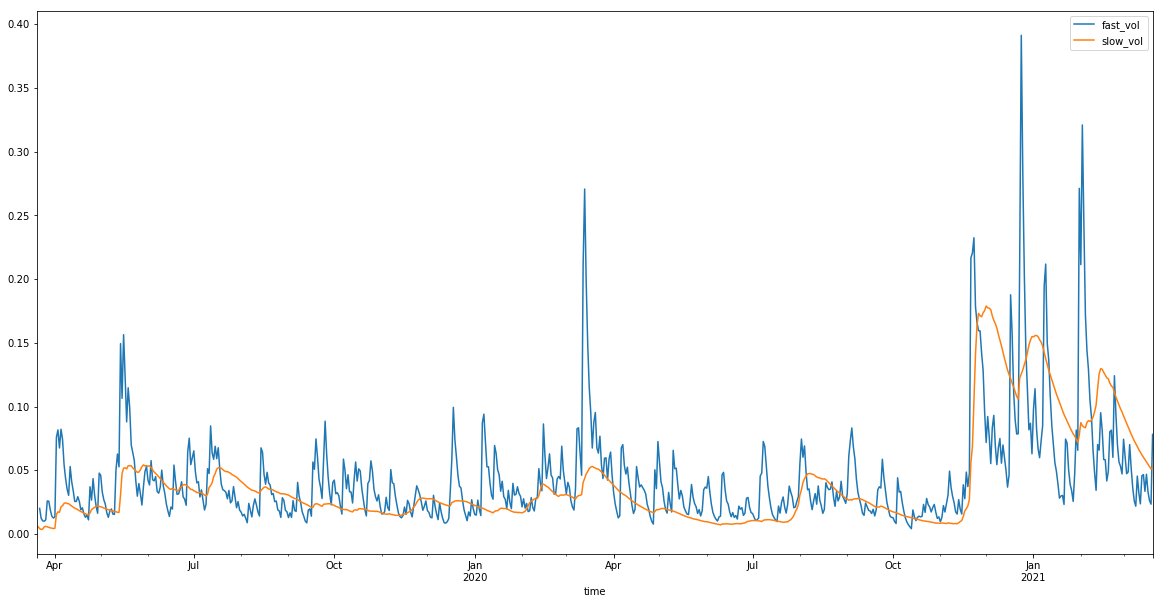

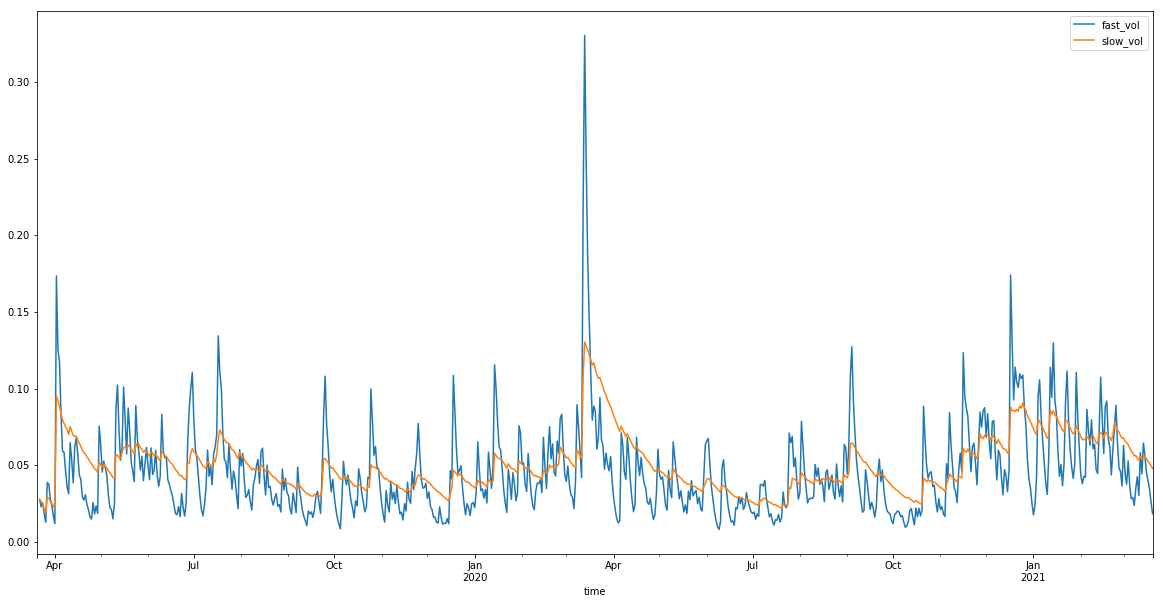

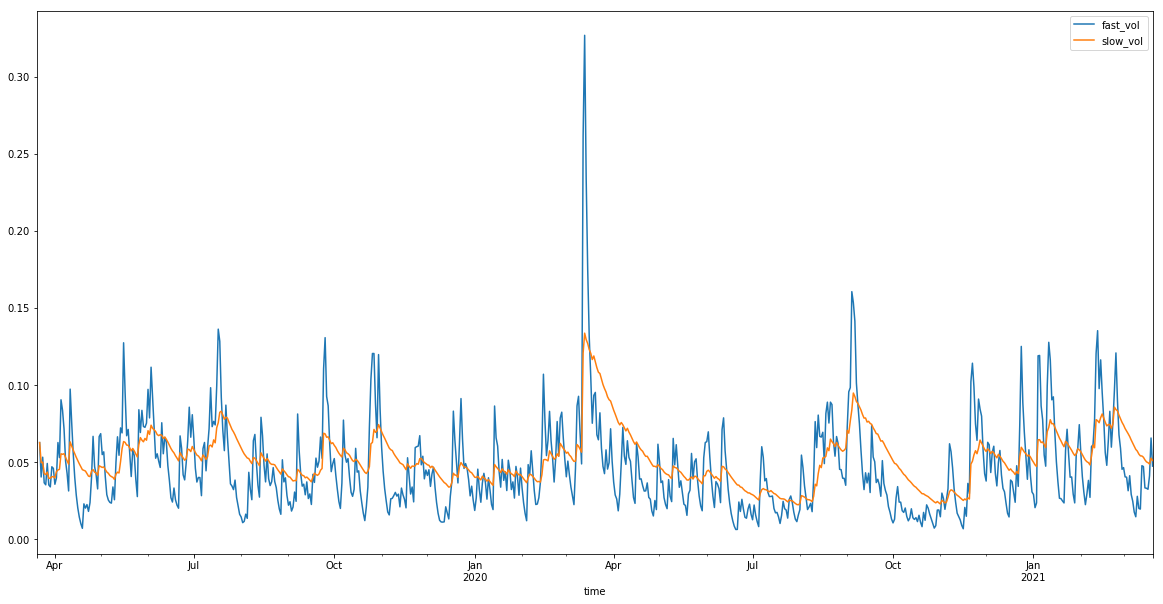

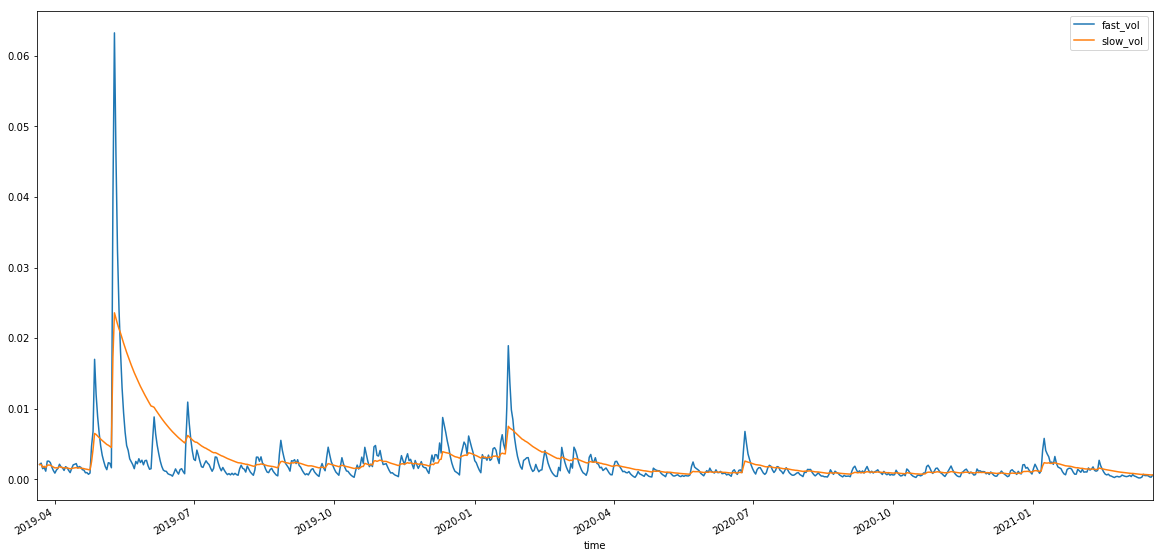

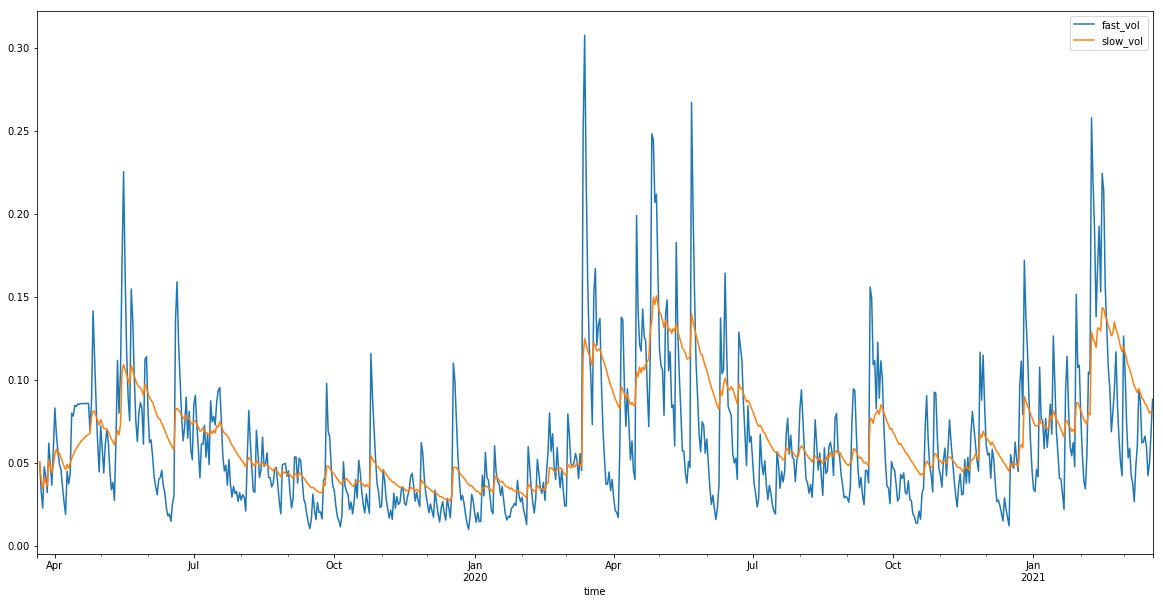

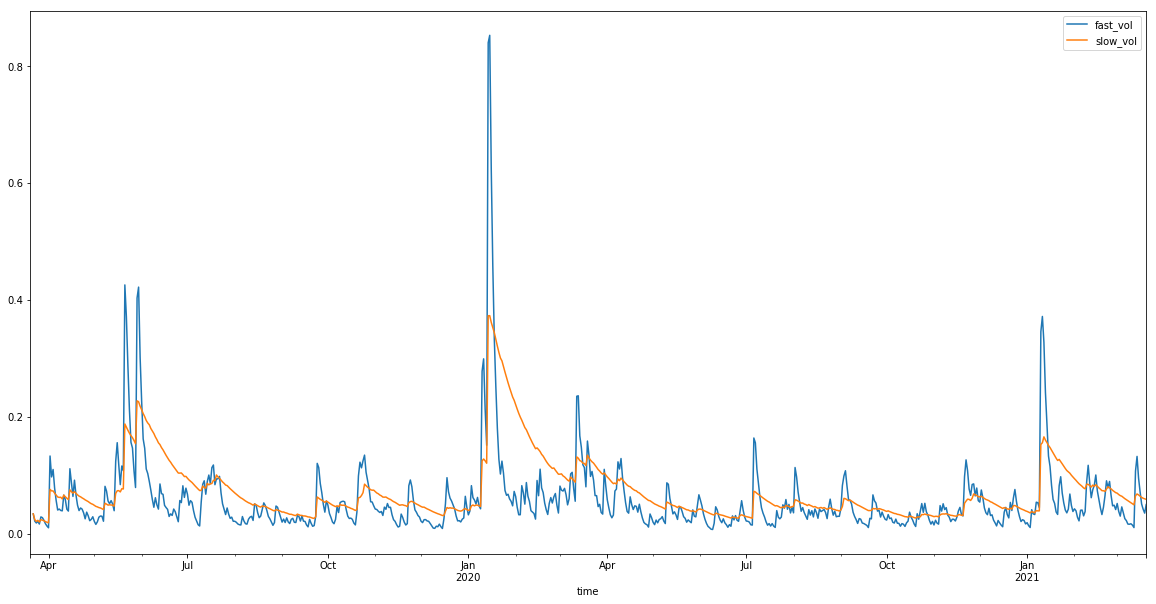

In [38]:
# Plot the EMA of cryptos daily return volatility
btc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
eth_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
ada_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
usdt_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
xrp_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
ltc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
trx_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
tusd_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
dgb_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))
bsv_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [35]:
# Construct Bollinger Band (Trading Signal, Feature Three)
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
btc_df['bollinger_mid_band'] = btc_df['BTC close'].rolling(window=bollinger_window).mean()
btc_df['bollinger_std'] = btc_df['BTC close'].rolling(window=20).std()

eth_df['bollinger_mid_band'] = eth_df['ETH close'].rolling(window=bollinger_window).mean()
eth_df['bollinger_std'] = eth_df['ETH close'].rolling(window=20).std()

ada_df['bollinger_mid_band'] = ada_df['ADA close'].rolling(window=bollinger_window).mean()
ada_df['bollinger_std'] = ada_df['ADA close'].rolling(window=20).std()

usdt_df['bollinger_mid_band'] = usdt_df['USDT close'].rolling(window=bollinger_window).mean()
usdt_df['bollinger_std'] = usdt_df['USDT close'].rolling(window=20).std()

xrp_df['bollinger_mid_band'] = xrp_df['XRP close'].rolling(window=bollinger_window).mean()
xrp_df['bollinger_std'] = xrp_df['XRP close'].rolling(window=20).std()

ltc_df['bollinger_mid_band'] = ltc_df['LTC close'].rolling(window=bollinger_window).mean()
ltc_df['bollinger_std'] = ltc_df['LTC close'].rolling(window=20).std()

trx_df['bollinger_mid_band'] = trx_df['TRX close'].rolling(window=bollinger_window).mean()
trx_df['bollinger_std'] = trx_df['TRX close'].rolling(window=20).std()

tusd_df['bollinger_mid_band'] = tusd_df['TUSD close'].rolling(window=bollinger_window).mean()
tusd_df['bollinger_std'] = tusd_df['TUSD close'].rolling(window=20).std()

dgb_df['bollinger_mid_band'] = dgb_df['DGB close'].rolling(window=bollinger_window).mean()
dgb_df['bollinger_std'] = dgb_df['DGB close'].rolling(window=20).std()

bsv_df['bollinger_mid_band'] = bsv_df['BSV close'].rolling(window=bollinger_window).mean()
bsv_df['bollinger_std'] = bsv_df['BSV close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

eth_df['bollinger_upper_band']  = eth_df['bollinger_mid_band'] + (eth_df['bollinger_std'] * 1)
eth_df['bollinger_lower_band']  = eth_df['bollinger_mid_band'] - (eth_df['bollinger_std'] * 1)

ada_df['bollinger_upper_band']  = ada_df['bollinger_mid_band'] + (ada_df['bollinger_std'] * 1)
ada_df['bollinger_lower_band']  = ada_df['bollinger_mid_band'] - (ada_df['bollinger_std'] * 1)

usdt_df['bollinger_upper_band']  = usdt_df['bollinger_mid_band'] + (usdt_df['bollinger_std'] * 1)
usdt_df['bollinger_lower_band']  = usdt_df['bollinger_mid_band'] - (usdt_df['bollinger_std'] * 1)

xrp_df['bollinger_upper_band']  = xrp_df['bollinger_mid_band'] + (xrp_df['bollinger_std'] * 1)
xrp_df['bollinger_lower_band']  = xrp_df['bollinger_mid_band'] - (xrp_df['bollinger_std'] * 1)

ltc_df['bollinger_upper_band']  = ltc_df['bollinger_mid_band'] + (ltc_df['bollinger_std'] * 1)
ltc_df['bollinger_lower_band']  = ltc_df['bollinger_mid_band'] - (ltc_df['bollinger_std'] * 1)

trx_df['bollinger_upper_band']  = trx_df['bollinger_mid_band'] + (trx_df['bollinger_std'] * 1)
trx_df['bollinger_lower_band']  = trx_df['bollinger_mid_band'] - (trx_df['bollinger_std'] * 1)

tusd_df['bollinger_upper_band']  = tusd_df['bollinger_mid_band'] + (tusd_df['bollinger_std'] * 1)
tusd_df['bollinger_lower_band']  = tusd_df['bollinger_mid_band'] - (tusd_df['bollinger_std'] * 1)

dgb_df['bollinger_upper_band']  = dgb_df['bollinger_mid_band'] + (dgb_df['bollinger_std'] * 1)
dgb_df['bollinger_lower_band']  = dgb_df['bollinger_mid_band'] - (dgb_df['bollinger_std'] * 1)

bsv_df['bollinger_upper_band']  = bsv_df['bollinger_mid_band'] + (bsv_df['bollinger_std'] * 1)
bsv_df['bollinger_lower_band']  = bsv_df['bollinger_mid_band'] - (bsv_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
btc_df['bollinger_long'] = np.where(btc_df['BTC close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
btc_df['bollinger_short'] = np.where(btc_df['BTC close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
btc_df['bollinger_signal'] = btc_df['bollinger_long'] + btc_df['bollinger_short']

eth_df['bollinger_long'] = np.where(eth_df['ETH close'] > eth_df['bollinger_lower_band'], 1.0, 0.0)
eth_df['bollinger_short'] = np.where(eth_df['ETH close'] < eth_df['bollinger_upper_band'], -1.0, 0.0)
eth_df['bollinger_signal'] = eth_df['bollinger_long'] + eth_df['bollinger_short']

ada_df['bollinger_long'] = np.where(ada_df['ADA close'] > ada_df['bollinger_lower_band'], 1.0, 0.0)
ada_df['bollinger_short'] = np.where(ada_df['ADA close'] < ada_df['bollinger_upper_band'], -1.0, 0.0)
ada_df['bollinger_signal'] = ada_df['bollinger_long'] + ada_df['bollinger_short']

usdt_df['bollinger_long'] = np.where(usdt_df['USDT close'] > usdt_df['bollinger_lower_band'], 1.0, 0.0)
usdt_df['bollinger_short'] = np.where(usdt_df['USDT close'] < usdt_df['bollinger_upper_band'], -1.0, 0.0)
usdt_df['bollinger_signal'] = usdt_df['bollinger_long'] + usdt_df['bollinger_short']

xrp_df['bollinger_long'] = np.where(xrp_df['XRP close'] > xrp_df['bollinger_lower_band'], 1.0, 0.0)
xrp_df['bollinger_short'] = np.where(xrp_df['XRP close'] < xrp_df['bollinger_upper_band'], -1.0, 0.0)
xrp_df['bollinger_signal'] = xrp_df['bollinger_long'] + xrp_df['bollinger_short']

ltc_df['bollinger_long'] = np.where(ltc_df['LTC close'] > ltc_df['bollinger_lower_band'], 1.0, 0.0)
ltc_df['bollinger_short'] = np.where(ltc_df['LTC close'] < ltc_df['bollinger_upper_band'], -1.0, 0.0)
ltc_df['bollinger_signal'] = ltc_df['bollinger_long'] + ltc_df['bollinger_short']

trx_df['bollinger_long'] = np.where(trx_df['TRX close'] > trx_df['bollinger_lower_band'], 1.0, 0.0)
trx_df['bollinger_short'] = np.where(trx_df['TRX close'] < trx_df['bollinger_upper_band'], -1.0, 0.0)
trx_df['bollinger_signal'] = trx_df['bollinger_long'] + trx_df['bollinger_short']

tusd_df['bollinger_long'] = np.where(tusd_df['TUSD close'] > tusd_df['bollinger_lower_band'], 1.0, 0.0)
tusd_df['bollinger_short'] = np.where(tusd_df['TUSD close'] < tusd_df['bollinger_upper_band'], -1.0, 0.0)
tusd_df['bollinger_signal'] = tusd_df['bollinger_long'] + tusd_df['bollinger_short']

dgb_df['bollinger_long'] = np.where(dgb_df['DGB close'] > dgb_df['bollinger_lower_band'], 1.0, 0.0)
dgb_df['bollinger_short'] = np.where(dgb_df['DGB close'] < dgb_df['bollinger_upper_band'], -1.0, 0.0)
dgb_df['bollinger_signal'] = dgb_df['bollinger_long'] + dgb_df['bollinger_short']

bsv_df['bollinger_long'] = np.where(bsv_df['fast_vol'] > bsv_df['bollinger_lower_band'], 1.0, 0.0)
bsv_df['bollinger_short'] = np.where(bsv_df['fast_vol'] < bsv_df['bollinger_upper_band'], -1.0, 0.0)
bsv_df['bollinger_signal'] = bsv_df['bollinger_long'] + bsv_df['bollinger_short']

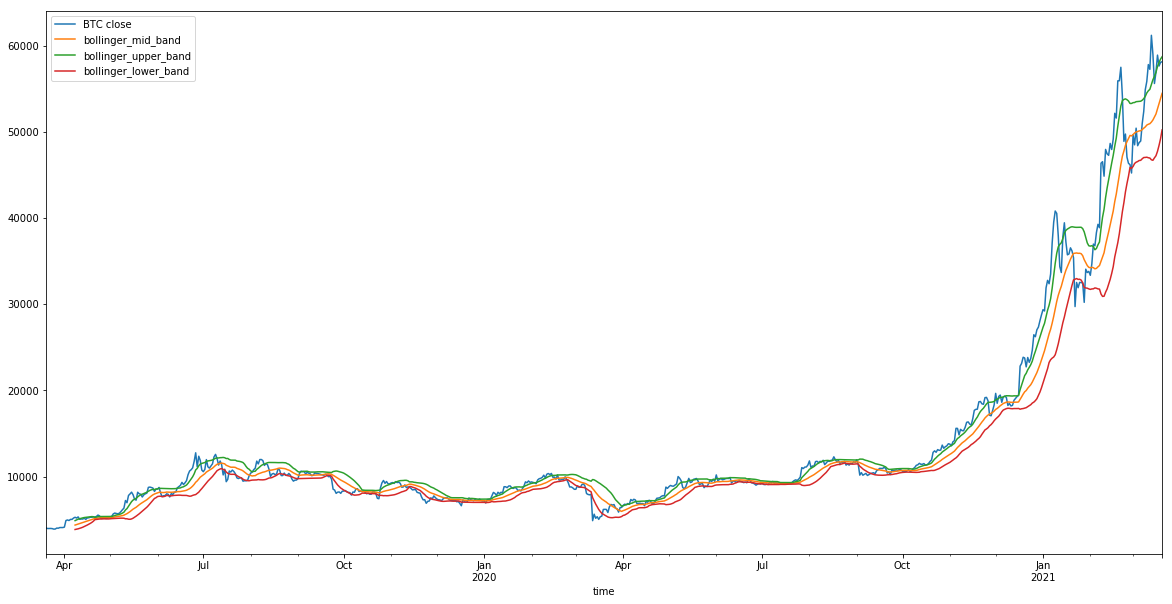

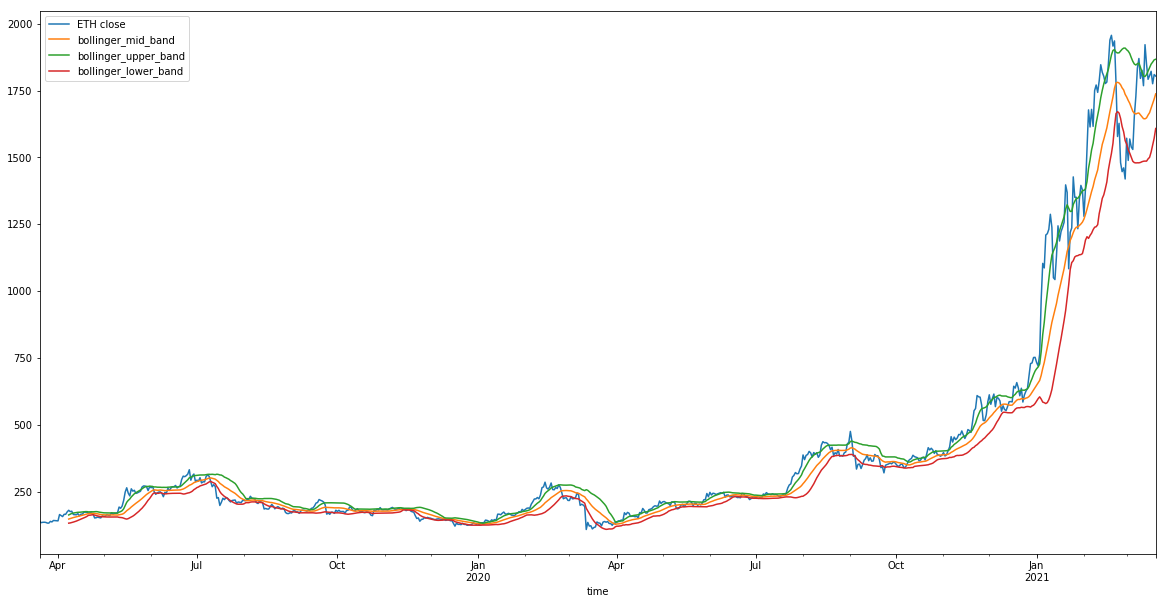

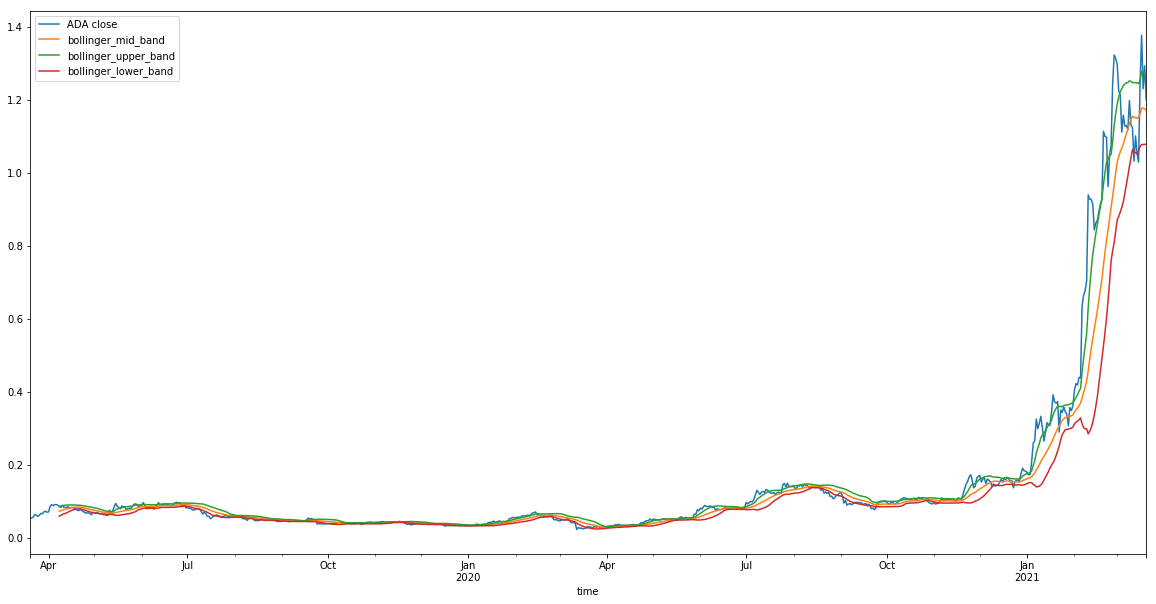

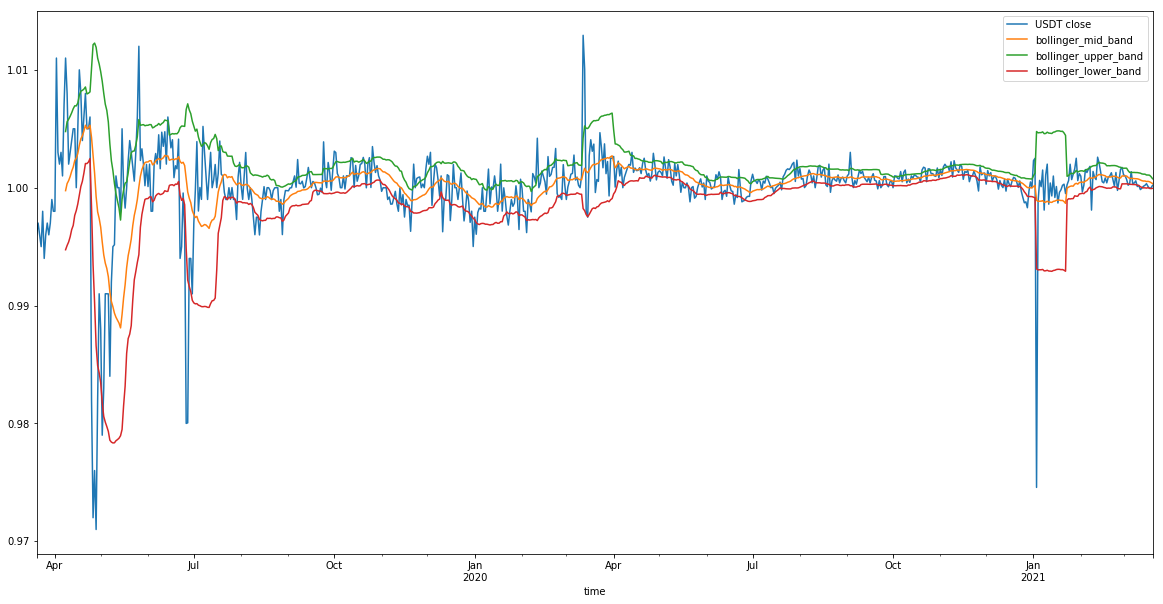

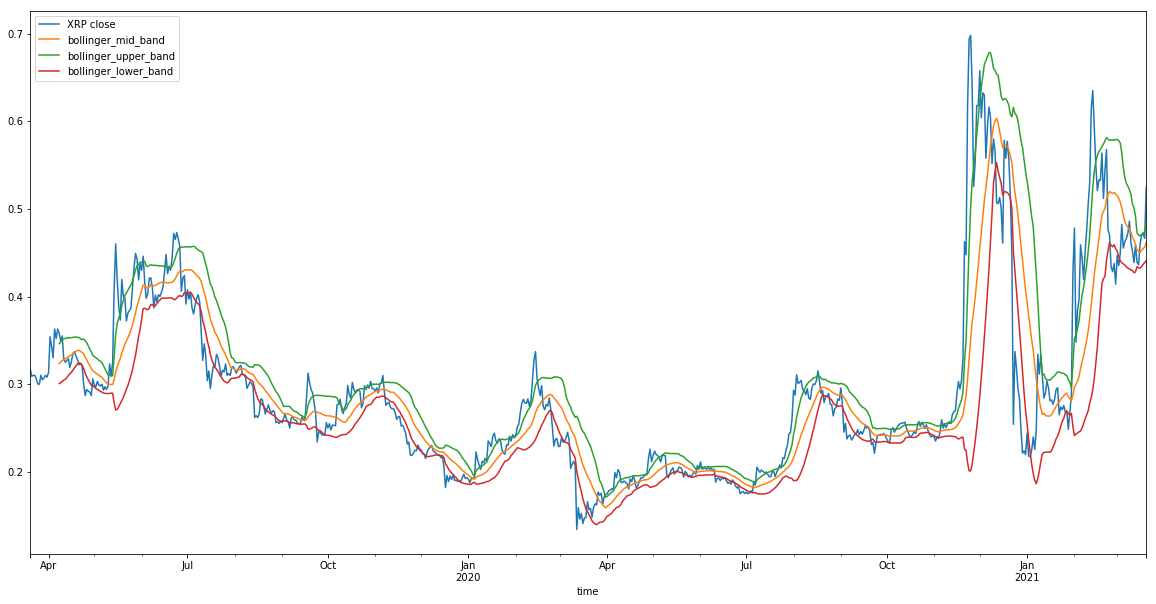

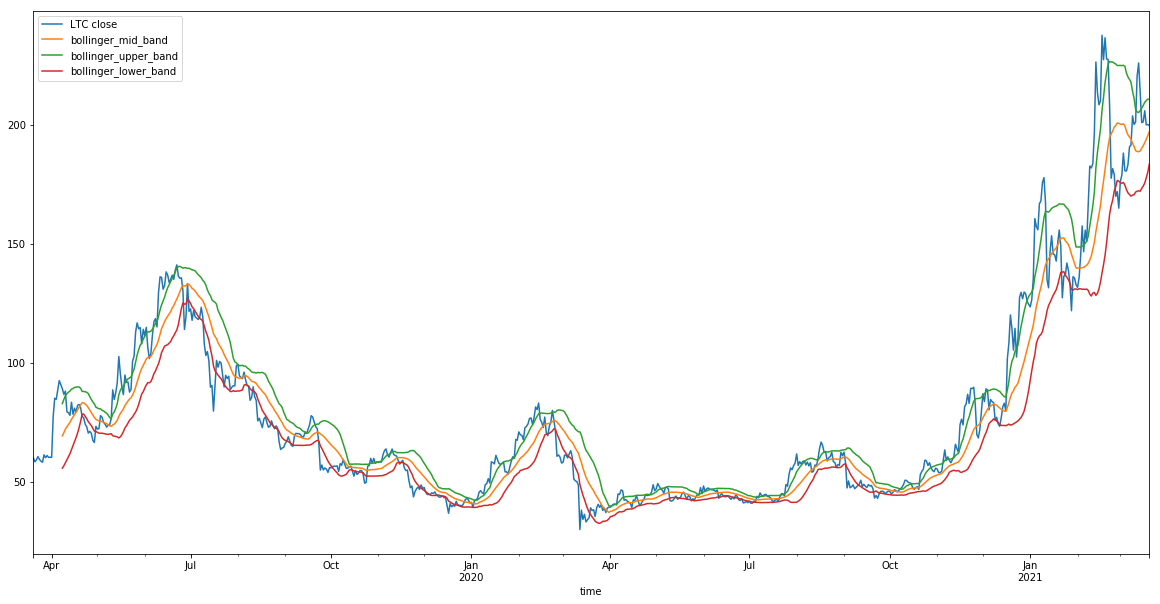

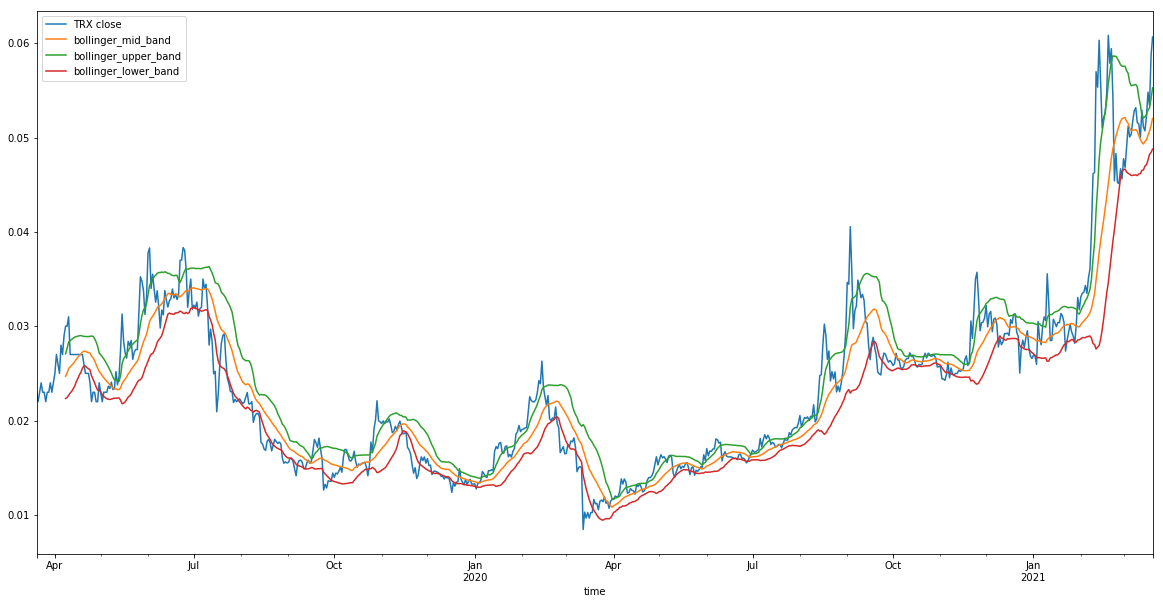

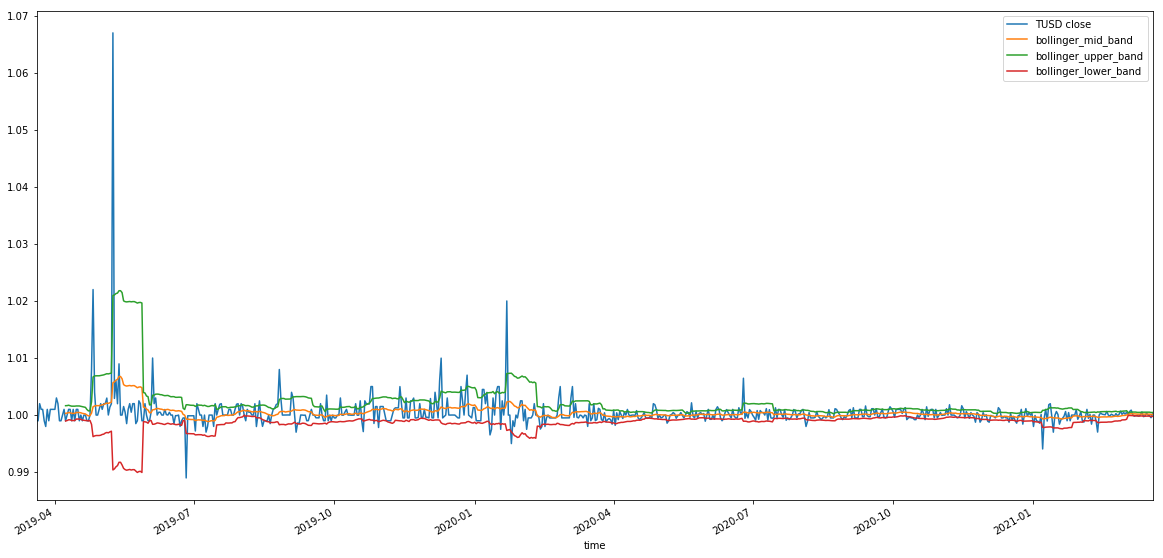

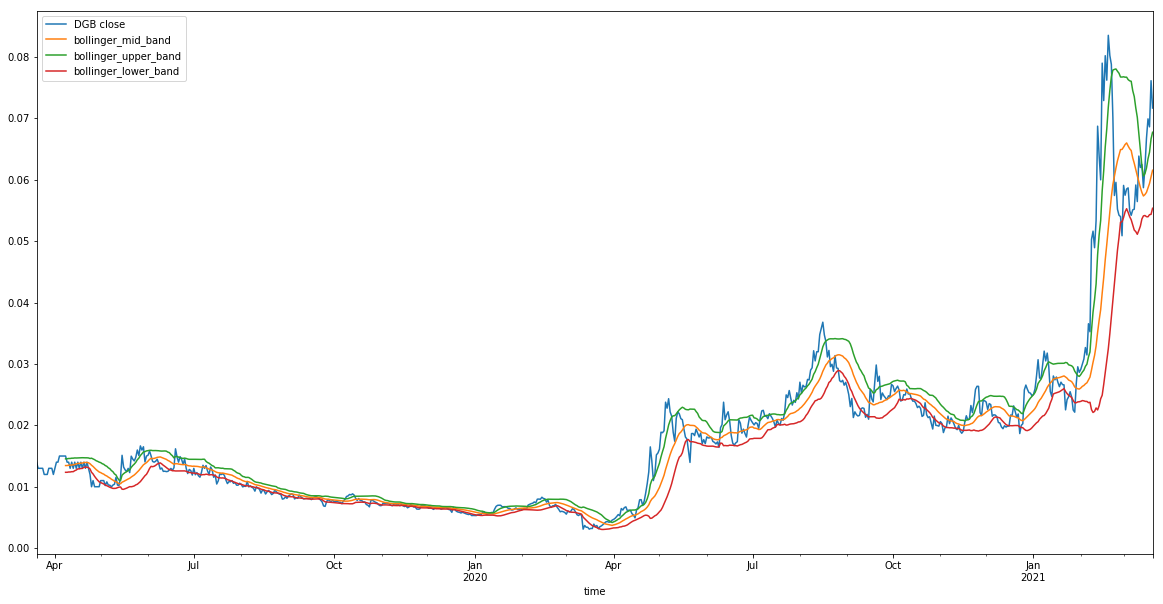

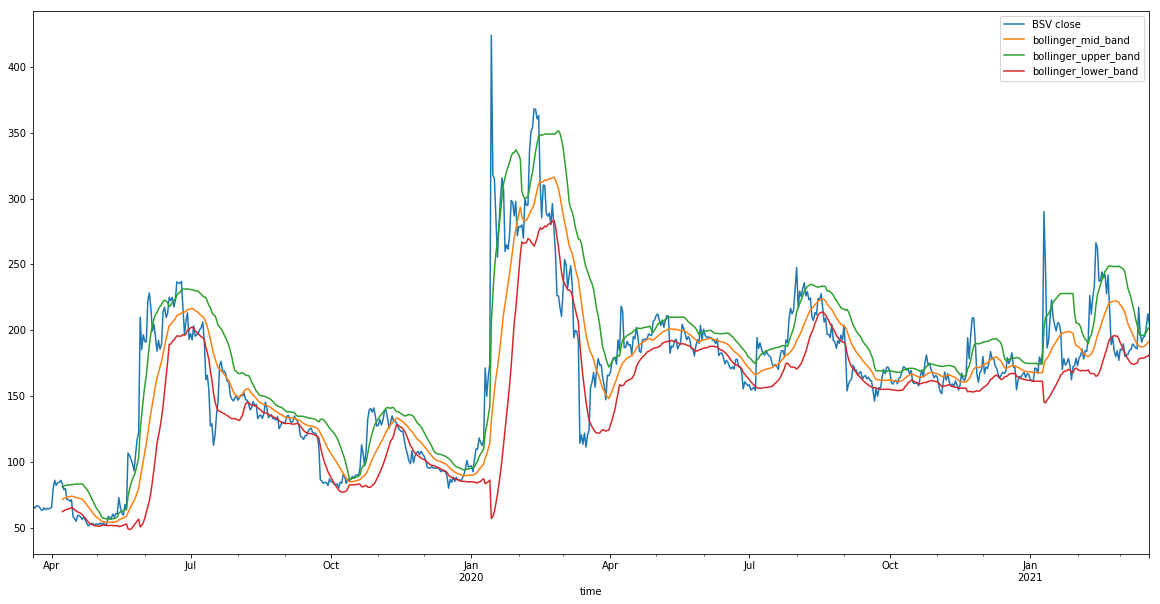

In [37]:
# Plot the Bollinger Bands for crypto closing prices
btc_df[['BTC close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
eth_df[['ETH close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
ada_df[['ADA close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
usdt_df[['USDT close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
xrp_df[['XRP close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
ltc_df[['LTC close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
trx_df[['TRX close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
tusd_df[['TUSD close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
dgb_df[['DGB close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))
bsv_df[['BSV close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [40]:
# Exporting trading signal data to csv
btc_trading_data_csv = btc_df.to_csv('BitcoinTradingSignals.csv', index = True)
eth_trading_data_csv = eth_df.to_csv('EthereumTradingSignals.csv', index = True)
ada_trading_data_csv = ada_df.to_csv('CardanoTradingSignals.csv', index = True)
usdt_trading_data_csv = usdt_df.to_csv('TetherTradingSignals.csv', index = True)
xrp_trading_data_csv = xrp_df.to_csv('RippleTradingSignals.csv', index = True)
lt_tradingc_data_csv = ltc_df.to_csv('LitecoinTradingSignals.csv', index = True)
trx_trading_data_csv = trx_df.to_csv('TronTradingSignals.csv', index = True)
tusd_trading_data_csv = tusd_df.to_csv('TrueUSDTradingSignals.csv', index = True)
dgb_trading_data_csv = dgb_df.to_csv('DigiByteTradingSignals.csv', index = True)
bsv_trading_data_csv = bsv_df.to_csv('BitcoinSVTradingSignals.csv', index = True)